In [1]:
%load_ext autoreload
%autoreload 2

# Dataset

100%|██████████| 1891/1891 [00:02<00:00, 790.85it/s]


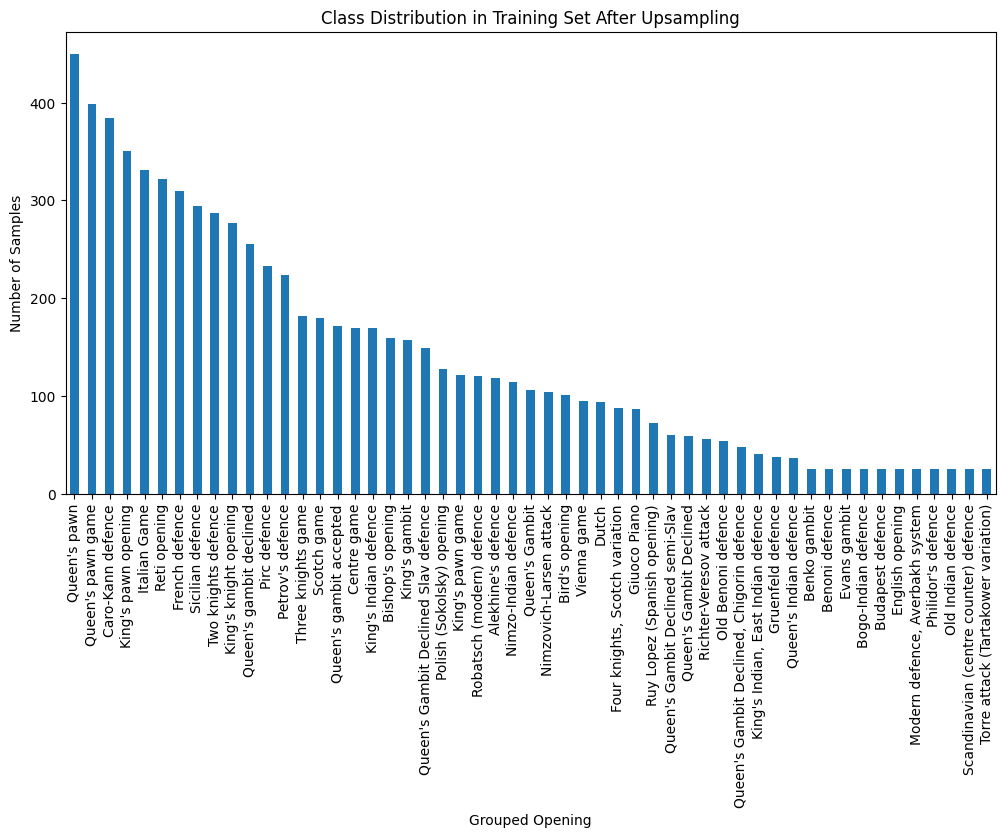

Data saved successfully at ./data!


In [3]:
from DataLoading import load_dataset

X_train, X_test, y_train, y_test = load_dataset()

In [5]:
import numpy as np 

unique_classes_train = np.unique(y_train)
unique_classes_test = np.unique(y_test)
y_combined_unique = np.concatenate((unique_classes_train, unique_classes_test))

num_classes = len(np.unique(y_combined_unique))
seq_len = 28

print(X_train.shape)
print(y_train.shape)

input_shape = (seq_len, 8, 8, X_train.shape[4])

(7470, 28, 8, 8, 12)
(7470,)


In [6]:
# Flatten Datasets
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Random Forest

Evaluating Random Forest...


/home/nmazzy/AppliedMachineLearning/ChessOpenningMovePredictor/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.8720
F1 Score: 0.8643
Precision: 0.8743
Recall: 0.8720


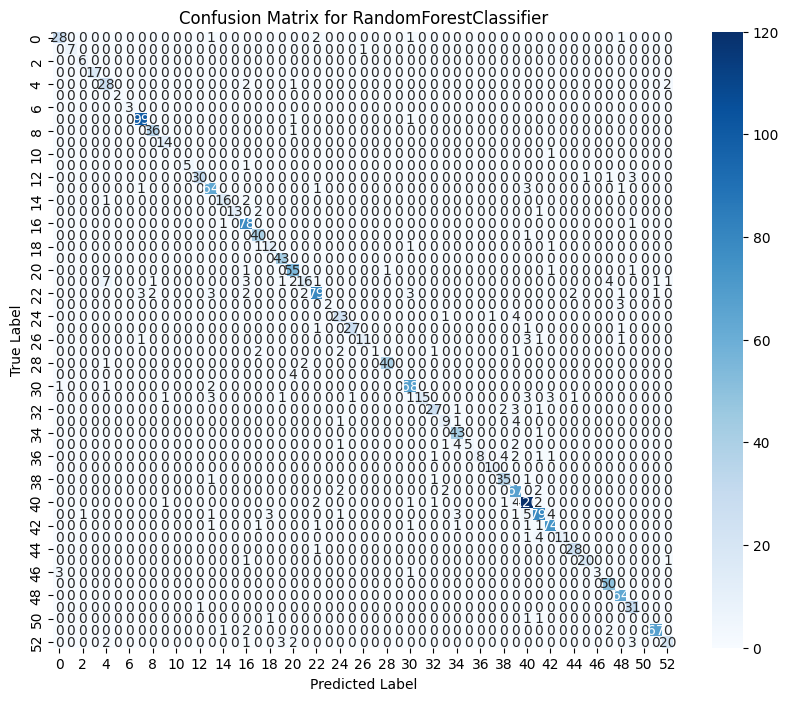

In [8]:
from sklearn.ensemble import RandomForestClassifier
from Train import evaluate_model

print("Evaluating Random Forest...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
evaluate_model(rf_model, X_train_flat, y_train, X_test_flat, y_test)

# CNN

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.0426 - f1_score: 0.0199 - loss: 3.8464
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.1070 - f1_score: 0.0555 - loss: 3.5018
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.1950 - f1_score: 0.1179 - loss: 3.0733
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.2816 - f1_score: 0.2135 - loss: 2.6197
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.4013 - f1_score: 0.3328 - loss: 2.2475
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.4442 - f1_score: 0.3767 - loss: 1.9890
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.4985 - f1_score: 0.4435 - loss: 1.8286
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.5491 - f1_score: 0.4989 - loss: 1.6313
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.6032 - f1_score: 0.5550 - loss: 1.4423
Epoch 10/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 

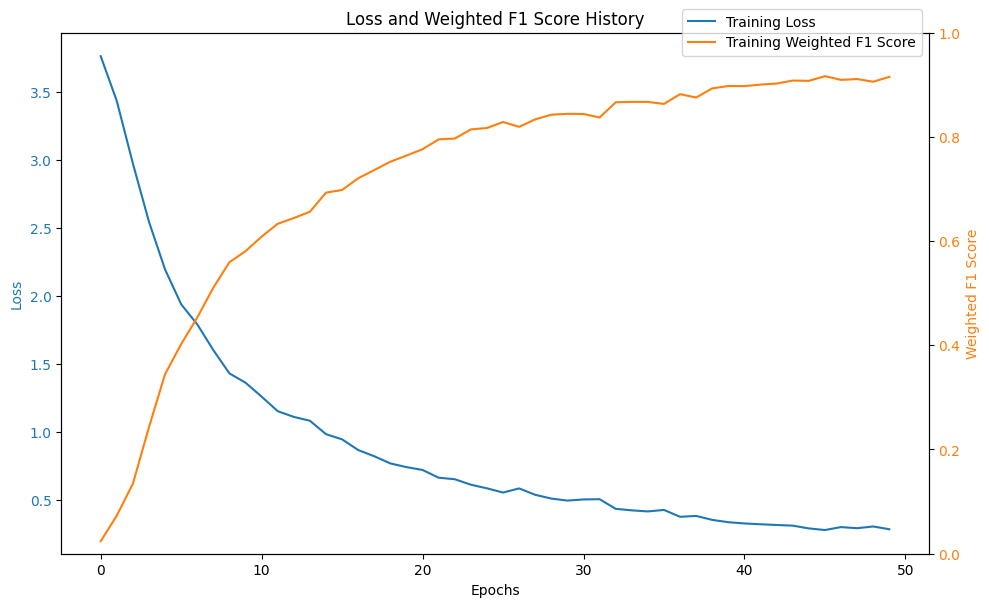

Accuracy: 0.8710
F1 Score: 0.8676
Precision: 0.8772
Recall: 0.8710


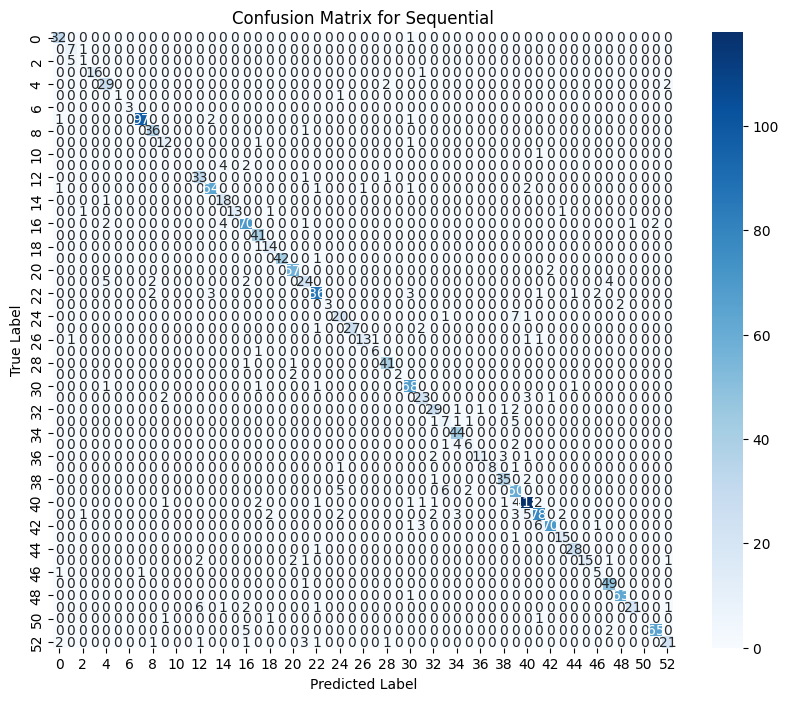

In [42]:
from Train import create_cnn_model
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
from IPython.display import display, HTML

# Encode labels if they are not already encoded
label_encoder = LabelEncoder()
y_train_encoded = to_categorical(label_encoder.fit_transform(y_train))
y_test_encoded = to_categorical(label_encoder.transform(y_test))

# Create CNN model
num_classes = y_train_encoded.shape[1]
cnn_model = create_cnn_model((seq_len, 8, 8, 12), num_classes)
fit_params = {
    'epochs': 50,
    'batch_size': 512
}

# Evaluate the CNN model
display(HTML("<h1>Evaluating CNN Model:</h1>"))
evaluate_model(model=cnn_model, 
               X_train=X_train, 
               y_train=y_train_encoded, 
               X_test=X_test, 
               y_test=y_test_encoded, 
               fit_params=fit_params)